# LoRa Data Analysis - Algorithm Comparison


We first declare a fixed parameters.

Those parameters are not changed during the experiments.

Fixed communication parameters are listed below:
- Code Rate: 4/5
- Bandwidth: 125 kHz
- Payload length: 12 B

End nodes:
- used an adaptive data rate algorithm (ADR) for communication parameters selection.

Access points:
- two access points were used to avoid a duty cycle depletion

Initial declaration

In [618]:
%matplotlib inline
import pandas as pd # import pandas
import numpy as np # import numpy
import matplotlib as mpl # import matplotlib
import matplotlib_inline as mpl_inl # import matplotlib
import matplotlib.pyplot as plt # import plotting module
import statistics
import math
import base64
from IPython.display import set_matplotlib_formats # module for svg export
from IPython.display import display

mpl_inl.backend_inline.set_matplotlib_formats('svg') # set export to svg file
cut_ratio = 0.05 # Values below 5% of mean value are simply cut from charts to make it more readable
subfolders = ['s1r1', 's2r1', 's3r1']
algorithms = ['adr', 'ucb', 'ts']
output_format = 'png'
uplink_message_files = []
dataset_labels = []

for alg, subfolder in zip(algorithms, subfolders):
    uplink_message_files.append('./data/' + alg + '/' + subfolder + '/uplink_messages.csv')
    dataset_labels.append(alg.upper())

## Analysis of Uplink Messages

We read a csv file with uplink messages

In [619]:
uplink_data = []

for file in uplink_message_files:
    uplink_data.append(pd.read_csv(file, delimiter=','))

Let us have a look at various columns that are present and can be evaluated.

In [620]:
for index, data in enumerate(uplink_data):
    print(dataset_labels[index])
    display(data.head())

ADR


,id,app_data,snr,rssi,duty_cycle_remaining,is_primary,receive_time,seq,frequency,spf,...,airtime,coderate,bandwidth,msg_group_number,message_type_id,ap_id,node_id,dev_id,application_id,battery
0,41076,QjVCQkJCAA==,10.25,-95,33991,t,2023-09-21 12:45:38.617,11621,866100000,11,...,-1211744222,4/5,125000,327,1,777777,d3d3,41046,NaN,NaN
1,41077,QjVCQkJCAA==,9.25,-59,33332,t,2023-09-21 12:45:45.197,51853,866900000,12,...,-1211737777,4/5,125000,97,1,777777,qqqq,41047,NaN,NaN
2,41078,QjVCQkJCAA==,13.00,-56,33332,t,2023-09-21 12:45:45.22,24618,866100000,11,...,-1211737704,4/5,125000,227,1,777777,7u7u,41048,NaN,NaN
3,41079,QjVCQkJCAA==,9.75,-80,101,f,2023-09-21 12:45:50.134,11623,866300000,7,...,-1211732497,4/5,125000,328,1,333333,d3d3,41049,NaN,NaN
4,41080,QjVCQkJCAA==,9.00,-81,30863,t,2023-09-21 12:45:50.136,11623,866300000,7,...,-1211732494,4/5,125000,328,1,777777,d3d3,41050,NaN,NaN


UCB


,id,app_data,snr,rssi,duty_cycle_remaining,is_primary,receive_time,seq,frequency,spf,...,airtime,coderate,bandwidth,msg_group_number,message_type_id,ap_id,node_id,dev_id,application_id,battery
0,50824,QjVCQkJCAA==,12.00,-59,34112,t,2023-09-22 12:46:22.378,58127,866700000,9,...,-1125300457,4/7,125000,1355,1,777777,mZmZ,50794,NaN,NaN
1,50825,QjVCQkJCAA==,10.00,-80,33915,t,2023-09-22 12:46:25.408,44315,866100000,11,...,-1125297207,4/7,125000,1650,1,777777,VVVV,50795,NaN,NaN
2,50826,QjVCQkJCAA==,12.25,-83,33915,t,2023-09-22 12:46:25.909,32754,866100000,8,...,-1125296649,4/7,125000,1593,1,777777,u7u7,50796,NaN,NaN
3,50827,QjVCQkJCAA==,11.75,-93,28,f,2023-09-22 12:46:29.38,32755,866300000,8,...,-1125293463,4/7,125000,1594,1,333333,u7u7,50797,NaN,NaN
4,50828,QjVCQkJCAA==,12.00,-81,32838,t,2023-09-22 12:46:29.382,32755,866300000,8,...,-1125293460,4/7,125000,1594,1,777777,u7u7,50798,NaN,NaN


TS


,id,app_data,snr,rssi,duty_cycle_remaining,is_primary,receive_time,seq,frequency,spf,...,airtime,coderate,bandwidth,msg_group_number,message_type_id,ap_id,node_id,dev_id,application_id,battery
0,83862,QjVCQkJCAA==,3.75,-111,33743,t,2023-09-27 13:43:23.081,20034,866900000,9,...,-689879779,4/7,125000,3336,1,333333,qqqq,83832,NaN,NaN
1,83863,QjVCQkJCAA==,11.75,-87,33382,t,2023-09-27 13:43:27.123,9423,866700000,8,...,-689876514,4/7,125000,2987,1,333333,3d3d,83833,NaN,NaN
2,83864,QjVCQkJCAA==,4.25,-106,33269,t,2023-09-27 13:43:28.654,39893,866700000,8,...,-689874015,4/7,125000,5201,1,333333,u7u7,83834,NaN,NaN
3,83865,QjVCQkJCAA==,8.75,-68,33156,t,2023-09-27 13:43:31.684,37806,866900000,7,...,-689870889,4/7,125000,3608,1,333333,VVVV,83835,NaN,NaN
4,83866,QjVCQkJCAA==,8.00,-97,33093,t,2023-09-27 13:43:33.217,20222,866500000,10,...,-689869626,4/7,125000,3245,1,333333,zMzM,83836,NaN,NaN


Let us have a look for different values to get an overview of overall values of different network parameters.

In [621]:
for index, data in enumerate(uplink_data):
    print(dataset_labels[index])
    display(data.describe())

ADR


,id,snr,rssi,duty_cycle_remaining,seq,frequency,spf,power,airtime,bandwidth,msg_group_number,message_type_id,ap_id,dev_id,application_id,battery
count,359.000000,359.000000,359.000000,359.000000,359.000000,3.590000e+02,359.000000,359.0,3.590000e+02,359.0,359.000000,359.0,359.000000,359.000000,0.0,0.0
mean,41255.000000,8.492340,-77.788301,11038.094708,29965.944290,8.665396e+08,10.467967,0.0,-1.208216e+09,125000.0,258.752089,1.0,562364.030641,41225.000000,NaN,NaN
std,103.778611,2.450155,13.539505,11383.142039,17723.895314,3.130242e+05,1.940009,0.0,2.968879e+06,0.0,97.506151,0.0,222427.662740,103.778611,NaN,NaN
min,41076.000000,-12.250000,-113.000000,17.000000,1040.000000,8.661000e+08,7.000000,0.0,-1.211744e+09,125000.0,63.000000,1.0,333333.000000,41046.000000,NaN,NaN
25%,41165.500000,7.750000,-88.000000,122.000000,14312.000000,8.663000e+08,9.000000,0.0,-1.211610e+09,125000.0,201.500000,1.0,333333.000000,41135.500000,NaN,NaN
50%,41255.000000,8.750000,-78.000000,7475.000000,28024.000000,8.665000e+08,11.000000,0.0,-1.208044e+09,125000.0,237.000000,1.0,777777.000000,41225.000000,NaN,NaN
75%,41344.500000,9.750000,-69.000000,20324.000000,45082.000000,8.669000e+08,12.000000,0.0,-1.204492e+09,125000.0,348.500000,1.0,777777.000000,41314.500000,NaN,NaN
max,41434.000000,13.250000,-53.000000,36000.000000,63089.000000,8.669000e+08,12.000000,0.0,-1.204326e+09,125000.0,411.000000,1.0,777777.000000,41404.000000,NaN,NaN


UCB


,id,snr,rssi,duty_cycle_remaining,seq,frequency,spf,power,airtime,bandwidth,msg_group_number,message_type_id,ap_id,dev_id,application_id,battery
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1.238000e+03,1238.000000,1238.0,1.238000e+03,1238.0,1238.000000,1238.0,1238.000000,1238.000000,0.0,0.0
mean,51442.500000,10.940428,-80.622779,14573.839257,30458.616317,8.664166e+08,9.090468,0.0,-1.120681e+09,125000.0,1083.197092,1.0,551964.983845,51412.500000,NaN,NaN
std,357.524125,2.359649,14.149303,11352.084065,17143.790067,2.812911e+05,1.069103,0.0,3.029975e+06,0.0,533.401746,0.0,222282.792686,357.524125,NaN,NaN
min,50824.000000,-10.250000,-115.000000,23.000000,1947.000000,8.661000e+08,7.000000,0.0,-1.125300e+09,125000.0,308.000000,1.0,333333.000000,50794.000000,NaN,NaN
25%,51133.250000,10.000000,-93.000000,3791.000000,19776.500000,8.661000e+08,9.000000,0.0,-1.124809e+09,125000.0,570.250000,1.0,333333.000000,51103.250000,NaN,NaN
50%,51442.500000,11.250000,-81.500000,13701.000000,30504.000000,8.663000e+08,9.000000,0.0,-1.121250e+09,125000.0,1359.500000,1.0,333333.000000,51412.500000,NaN,NaN
75%,51751.750000,12.500000,-72.000000,24225.500000,40301.750000,8.667000e+08,9.000000,0.0,-1.117805e+09,125000.0,1652.750000,1.0,777777.000000,51721.750000,NaN,NaN
max,52061.000000,17.500000,-48.000000,36000.000000,65353.000000,8.669000e+08,11.000000,0.0,-1.117507e+09,125000.0,1791.000000,1.0,777777.000000,52031.000000,NaN,NaN


TS


,id,snr,rssi,duty_cycle_remaining,seq,frequency,spf,power,airtime,bandwidth,msg_group_number,message_type_id,ap_id,dev_id,application_id,battery
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1.262000e+03,1262.000000,1262.0,1.262000e+03,1262.0,1262.000000,1262.0,1262.000000,1262.000000,0.0,0.0
mean,84492.500000,9.302496,-85.792393,9003.632330,31287.561014,8.665466e+08,8.528526,0.0,-6.877097e+08,125000.0,3693.282884,1.0,530902.797147,84462.500000,NaN,NaN
std,364.452329,2.848293,16.689676,11083.893745,17863.704967,2.805630e+05,1.005328,0.0,1.820154e+06,0.0,833.716554,0.0,220937.922747,364.452329,NaN,NaN
min,83862.000000,-12.000000,-118.000000,1.000000,110.000000,8.661000e+08,7.000000,0.0,-6.898798e+08,125000.0,2076.000000,1.0,333333.000000,83832.000000,NaN,NaN
25%,84177.250000,8.000000,-102.000000,29.000000,16663.000000,8.663000e+08,8.000000,0.0,-6.894334e+08,125000.0,3250.250000,1.0,333333.000000,84147.250000,NaN,NaN
50%,84492.500000,9.500000,-84.000000,1937.000000,34173.000000,8.665000e+08,8.000000,0.0,-6.891048e+08,125000.0,3423.500000,1.0,333333.000000,84462.500000,NaN,NaN
75%,84807.750000,11.500000,-71.000000,16717.500000,45838.750000,8.667000e+08,9.000000,0.0,-6.858319e+08,125000.0,4316.750000,1.0,777777.000000,84777.750000,NaN,NaN
max,85123.000000,20.750000,-52.000000,35908.000000,65316.000000,8.669000e+08,10.000000,0.0,-6.852932e+08,125000.0,5306.000000,1.0,777777.000000,85093.000000,NaN,NaN


### Picking up only Unique Uplink Messages

In [622]:
unique_messages = []

for index, data in enumerate(uplink_data):
    unique_messages.append(data[data.is_primary=="t"])
    print(f'Uplink messages received during {dataset_labels[index]} experiment: {len(unique_messages[index])}')

Uplink messages received during ADR experiment: 292
Uplink messages received during UCB experiment: 832
Uplink messages received during TS experiment: 828


### Spreading Factor

In [623]:
sfs = []

for index, data in enumerate(unique_messages):
    sfs.append(data.spf.value_counts())

# Find the union of all columns in all datasets
all_columns = set().union(*(df.index for df in sfs))

# Create a dictionary of DataFrames with the same columns for all datasets
datasets_dict = {}
for idx, df in enumerate(sfs):
    # Fill missing columns with 0
    df = df.reindex(all_columns, fill_value=0)
    datasets_dict[dataset_labels[idx]] = df

# Convert the dictionary to a list of pairs (DataFrame, label)
results = [(df, label) for label, df in datasets_dict.items()]

NameError: name 'output_format' is not defined

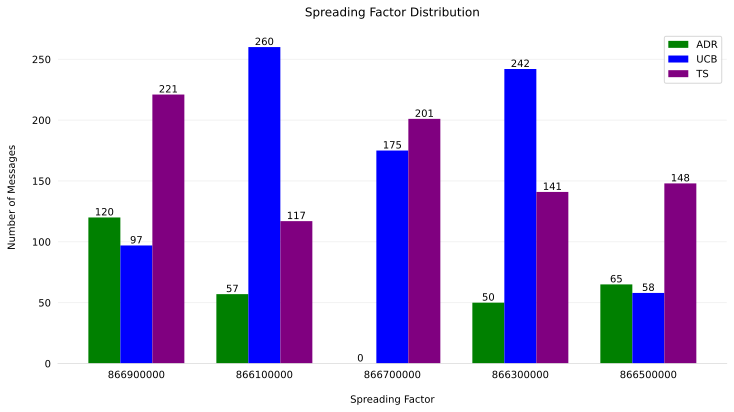

In [630]:
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar width.
bar_width = 0.25
index = np.arange(len(results[0][0].index))

colors = ['green', 'blue', 'purple']  # Define colors for each pair of datasets

for idx, (data, label) in enumerate(results):
    # Drop NA values before calculations
    data_cleaned = data.dropna()
    
    ax.bar(index + idx * bar_width, data_cleaned, width=bar_width, label=label, color=colors[idx])

# Set x-ticks and labels
ax.set_xticks(index + bar_width * (len(results) - 1) / 2)
ax.set_xticklabels(results[0][0].index)

# Add a legend
ax.legend()

# Axis styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels
ax.set_xlabel('Spreading Factor', labelpad=15)
ax.set_ylabel('Number of Messages', labelpad=15)
ax.set_title('Spreading Factor Distribution', pad=15)

# For each bar in the chart, add a text label
for bar in ax.patches:
    bar_value = round(bar.get_height())
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=10)

# Save the figure in a specific format (e.g., 'png')
fig.savefig(f'algorithms-sf-{subfolders[0]}-{subfolders[1]}-{subfolders[2]}.{output_format}', dpi=300)

# Show the plot (optional)
plt.show()

### Utilization of Frequency

Frequency is stored in Hz, so we need to convert it to MHz.

In [625]:
cfs = []

for index, data in enumerate(unique_messages):
    cfs.append(data.frequency.value_counts())

# Find the union of all columns in all datasets
all_columns = set().union(*(df.index for df in cfs))

# Create a dictionary of DataFrames with the same columns for all datasets
datasets_dict = {}
for idx, df in enumerate(cfs):
    # Fill missing columns with 0
    df = df.reindex(all_columns, fill_value=0)
    datasets_dict[dataset_labels[idx]] = df

# Convert the dictionary to a list of pairs (DataFrame, label)
results = [(df, label) for label, df in datasets_dict.items()]

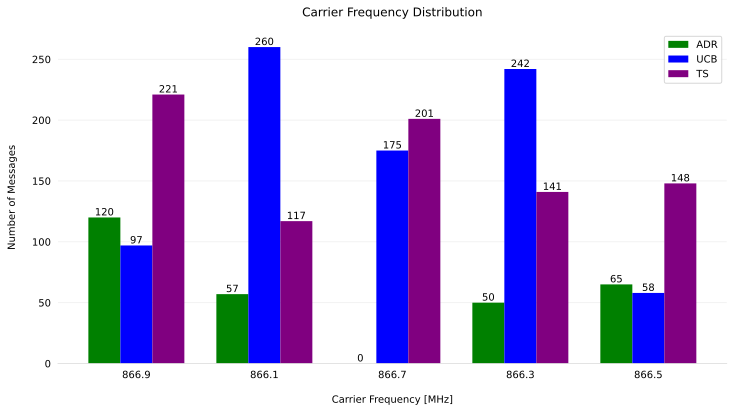

In [626]:
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar width.
bar_width = 0.25
index = np.arange(len(results[0][0].index))

colors = ['green', 'blue', 'purple']  # Define colors for each pair of datasets

for idx, (data, label) in enumerate(results):
    # Drop NA values before calculations
    data_cleaned = data.dropna()
    
    ax.bar(index + idx * bar_width, data_cleaned, width=bar_width, label=label, color=colors[idx])

# Set x-ticks and labels
ax.set_xticks(index + bar_width * (len(results) - 1) / 2)
ax.set_xticklabels(results[0][0].index / 1000000)

# Add a legend
ax.legend()

# Axis styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels
ax.set_xlabel('Carrier Frequency [MHz]', labelpad=15)
ax.set_ylabel('Number of Messages', labelpad=15)
ax.set_title('Carrier Frequency Distribution', pad=15)

# For each bar in the chart, add a text label
for bar in ax.patches:
    bar_value = round(bar.get_height())
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=10)

# Save the figure in a specific format (e.g., 'png')
fig.savefig(f'algorithms-cf-{subfolders[0]}-{subfolders[1]}-{subfolders[2]}.{output_format}', dpi=300)

# Show the plot (optional)
plt.show()

### Number of Unique Message per End Nodes

In [627]:
message_counts = []
unique_message_counts = []

for idx, data in enumerate(unique_messages):
    message_counts.append(data.node_id.value_counts().reset_index())
    message_counts[idx].columns = ['node_id', dataset_labels[idx]]

node_id_column = message_counts[0]['node_id']

result = pd.concat([node_id_column] + [df.drop('node_id', axis=1) for df in message_counts], axis=1)
result = result.fillna(0)

print(result)

  node_id  ADR  UCB   TS
0    ZmZm   41  148  151
1    VVVV   38  142  131
2    iIiI   35  130  122
3    d3d3   34  101  117
4    zMzM   30   68  110
5    7u7u   29   66  106
6    qqqq   26   63   27
7    mZmZ   22   51   24
8    u7u7   19   40   20
9    3d3d   18   23   20


Convert the table to LaTeX

In [628]:
num_columns = len(result.columns)
column_format = '| X ' * (num_columns - 1) + '| X |'
latex_code = result.to_latex(index=False, column_format=column_format)
print(latex_code)

\begin{tabular}{| X | X | X | X |}
\toprule
node_id & ADR & UCB & TS \\
\midrule
ZmZm & 41 & 148 & 151 \\
VVVV & 38 & 142 & 131 \\
iIiI & 35 & 130 & 122 \\
d3d3 & 34 & 101 & 117 \\
zMzM & 30 & 68 & 110 \\
7u7u & 29 & 66 & 106 \\
qqqq & 26 & 63 & 27 \\
mZmZ & 22 & 51 & 24 \\
u7u7 & 19 & 40 & 20 \\
3d3d & 18 & 23 & 20 \\
\bottomrule
\end{tabular}



Export LaTeX to file.

In [629]:
file_path = f'message-count-{subfolders[0]}-{subfolders[1]}-{subfolders[2]}.tex'

with open(file_path, 'w') as file:
    file.write(latex_code)

print(f'The LaTeX table has been saved to {file_path}')

The LaTeX table has been saved to message-count-s1r5-s2r5-s3r5.tex


The End.